In [190]:
print ( "Hello World!")

Hello World!


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100


In [192]:
df = pd.read_csv("/Users/ms/Desktop/Boot Camp /2nd Project/winequality-white.csv" , sep= ';')

In [193]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [195]:
df.shape

(4898, 12)

In [196]:
df['quality_label'] = df['quality'].apply(lambda value: 1 if value <= 5 
else 2 if value <= 7 
else 3 )

df['quality_label'] = pd.Categorical(df['quality_label'], categories=[1, 2, 3])


In [197]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [198]:
df['quality'].nlargest(10)

774     9
820     9
827     9
876     9
1605    9
17      8
20      8
22      8
68      8
74      8
Name: quality, dtype: int64

In [199]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:>

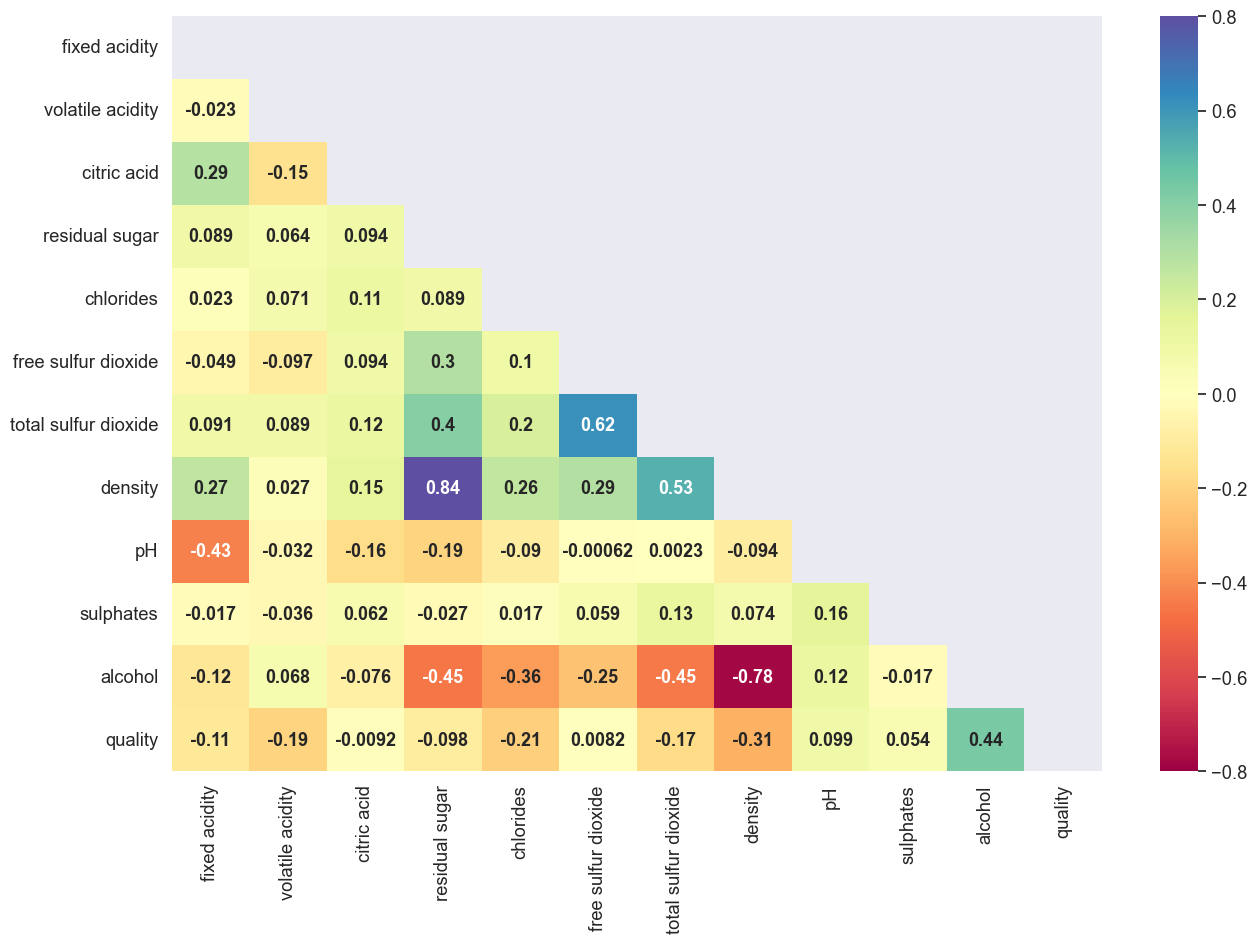

In [200]:
plt.figure(figsize=(15,10), facecolor='w', edgecolor='k')

sns.set(font_scale=1.2)

corr = df.corr() #.corr()

matrix = np.triu(corr)

sns.heatmap(corr, annot=True, annot_kws = {'fontsize':13, 'fontweight': 'bold'}, square = False, vmin = -.8 , vmax = +.8 , center = 0, cmap= 'Spectral', fmt='.2g', mask = matrix )


# Split data

In [201]:
X = df
y = df['quality_label']
X.drop(['quality_label','quality'], axis=1, inplace=True)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [203]:
print(f"Dataframe shape: {df.shape}")
print(f" No. of x_Train : {X_train.shape}")
print(f" No. of x_Test : {X_test.shape}")
print(f" No. of y_Train : {y_train.shape}")
print(f" No. of y_Test : {y_test.shape}")


Dataframe shape: (4898, 11)
 No. of x_Train : (3918, 11)
 No. of x_Test : (980, 11)
 No. of y_Train : (3918,)
 No. of y_Test : (980,)


# Train Model

In [204]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 10, max_iter= 10000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=10)

In [205]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [206]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

In [207]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [208]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Evaluate Models


In [209]:
log.score(X_test,y_test)

0.6938775510204082

In [210]:
svc_rbf.score(X_test,y_test)

0.6061224489795919

In [211]:
svc_lin.score(X_test,y_test)

0.6938775510204082

In [212]:
tree.score(X_test,y_test)

0.7295918367346939

In [213]:
forest.score(X_test,y_test)

0.7959183673469388

<AxesSubplot:title={'center':'Machine Learning Models Accuracy on White Wines'}>

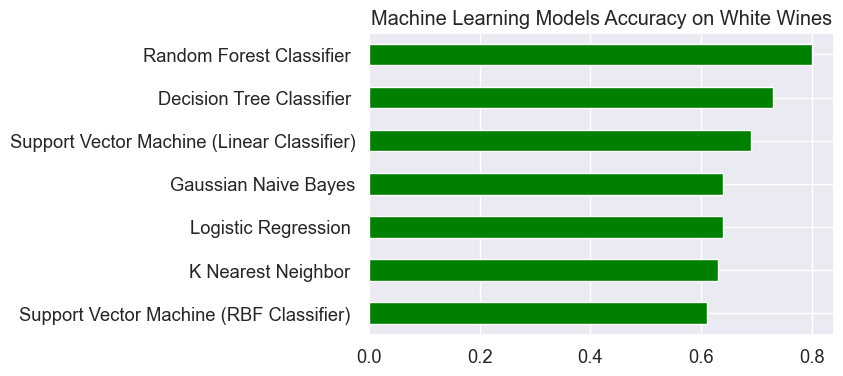

In [214]:
d = {'Logistic Regression ': [0.64],'K Nearest Neighbor ': [ 0.63],
'Support Vector Machine (Linear Classifier)': [0.69],'Support Vector Machine (RBF Classifier) ': [0.61], "Gaussian Naive Bayes": [0.64],
'Decision Tree Classifier ': [0.73], 'Random Forest Classifier ': [0.80]}
df = pd.DataFrame(data=d)
df=df.T


df.sort_values(0,ascending=True,inplace=True)
df.plot.barh(color= 'green',title='Machine Learning Models Accuracy on White Wines', legend=None)

In [215]:
df

,0
Support Vector Machine (RBF Classifier),0.61
K Nearest Neighbor,0.63
Logistic Regression,0.64
Gaussian Naive Bayes,0.64
Support Vector Machine (Linear Classifier),0.69
Decision Tree Classifier,0.73
Random Forest Classifier,0.80


In [216]:
#Create a function within many Machine Learning Models
def models_1(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 10)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_test,y_test))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_test,y_test))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_test,y_test))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_test,y_test))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_test,y_test))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_test,y_test))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_test,y_test))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [217]:
models_1 (X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.6377551020408163
[1]K Nearest Neighbor Training Accuracy: 0.6285714285714286
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6938775510204082
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6061224489795919
[4]Gaussian Naive Bayes Training Accuracy: 0.6418367346938776
[5]Decision Tree Classifier Training Accuracy: 0.7295918367346939
[6]Random Forest Classifier Training Accuracy: 0.7959183673469388


(LogisticRegression(random_state=10),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

In [218]:
# Check accuracy for the Random Forest Classifier Train, Test 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = rfc.score(X_test, y_test)
print("The training accuracy for Random Forest is:", rfc.score(X_train, y_train)*100, "%")
print("The testing accuracy for Random Forest is:", rfc_acc * 100, "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 79.28571428571428 %


Feature: 0, Score: 0.06821
Feature: 1, Score: 0.11410
Feature: 2, Score: 0.08011
Feature: 3, Score: 0.08597
Feature: 4, Score: 0.08382
Feature: 5, Score: 0.09942
Feature: 6, Score: 0.08678
Feature: 7, Score: 0.10316
Feature: 8, Score: 0.07691
Feature: 9, Score: 0.07144
Feature: 10, Score: 0.13009


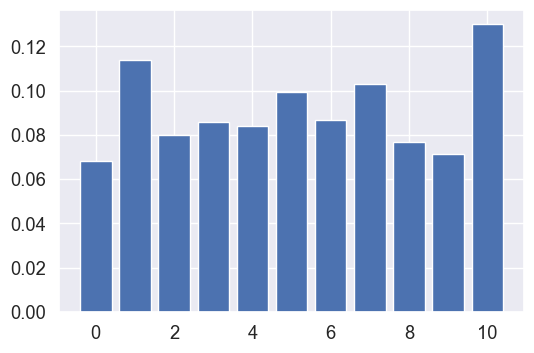

In [219]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [220]:
df_dropped_1 = X.drop(['density', 'free sulfur dioxide', 'sulphates', 'fixed acidity' ],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [221]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [222]:
#X.drop(['chlorides' ],axis=1,inplace=True)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [223]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


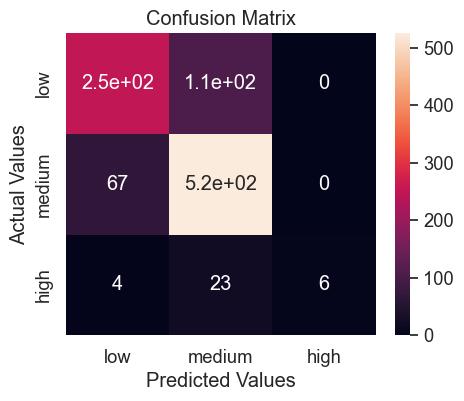

confusion_matrix: 
  [[249 106   0]
 [ 67 525   0]
 [  4  23   6]]
Accuracy score: 0.7959183673469388
              precision    recall  f1-score   support

         low       0.78      0.70      0.74       355
      medium       0.80      0.89      0.84       592
        high       1.00      0.18      0.31        33

    accuracy                           0.80       980
   macro avg       0.86      0.59      0.63       980
weighted avg       0.80      0.80      0.79       980

Cohen-Kappa score: 0.5733881253890656


In [233]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


print ("confusion_matrix: \n " ,   confusion_matrix(y_test, pred_RF))
print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [234]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.704592880096824


In [235]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [238]:
X.drop(['free sulfur dioxide', 'chlorides','sulphates', 'fixed acidity' ],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

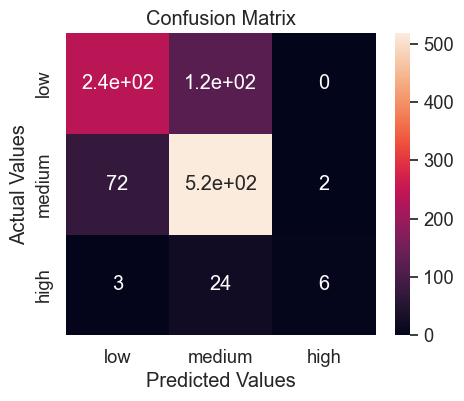

confusion_matrix: 
  [[237 118   0]
 [ 72 518   2]
 [  3  24   6]]
Accuracy score: 0.7765306122448979
              precision    recall  f1-score   support

         low       0.76      0.67      0.71       355
      medium       0.78      0.88      0.83       592
        high       0.75      0.18      0.29        33

    accuracy                           0.78       980
   macro avg       0.76      0.57      0.61       980
weighted avg       0.77      0.78      0.77       980

Cohen-Kappa score: 0.5320676062234007


In [239]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


print ("confusion_matrix: \n " ,   confusion_matrix(y_test, pred_RF))
print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [240]:
X.drop(['density'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

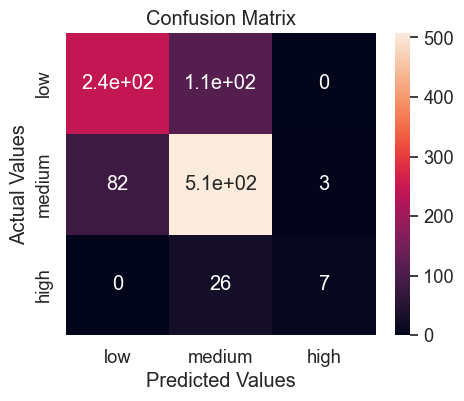

confusion_matrix: 
  [[243 112   0]
 [ 82 507   3]
 [  0  26   7]]
Accuracy score: 0.7724489795918368
              precision    recall  f1-score   support

         low       0.75      0.68      0.71       355
      medium       0.79      0.86      0.82       592
        high       0.70      0.21      0.33        33

    accuracy                           0.77       980
   macro avg       0.74      0.58      0.62       980
weighted avg       0.77      0.77      0.77       980

Cohen-Kappa score: 0.5278434931025915


In [241]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


print ("confusion_matrix: \n " ,   confusion_matrix(y_test, pred_RF))
print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [242]:

# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.6911218229623138


In [243]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [244]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   9.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   9.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   9.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  13.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [245]:
rf_random.best_params_


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [246]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)


0.789795918367347
[[229 126   0]
 [ 51 538   3]
 [  0  26   7]]


In [247]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=  12.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=  12.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=  11.2s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  11.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  10.8s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=  10.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1250; total time=  11.2s

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [248]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 1350}

In [249]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.7673469387755102
[[216 139   0]
 [ 55 536   1]
 [  0  33   0]]


In [250]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())


0.6911218229623138


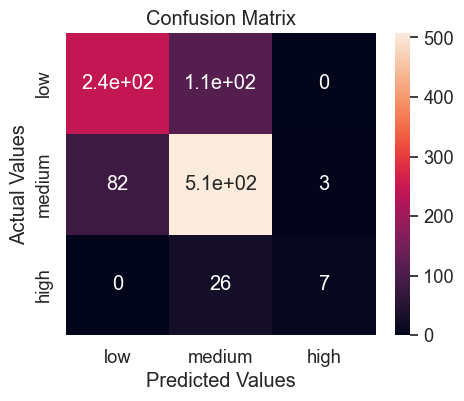

Accuracy score: 0.7724489795918368
              precision    recall  f1-score   support

         low       0.75      0.68      0.71       355
      medium       0.79      0.86      0.82       592
        high       0.70      0.21      0.33        33

    accuracy                           0.77       980
   macro avg       0.74      0.58      0.62       980
weighted avg       0.77      0.77      0.77       980

Cohen-Kappa score: 0.5278434931025915


In [251]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)